In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

C:\Users\HRISHIKESH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Create Results Dataframe

In [4]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    restults_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    return restults_df

In [5]:
results = create_results_df()
results

,index,RMSE,MAE,R2
0,LinearRegression,235.506900,188.000,-453.677085
1,LSTM,93.187311,75.125,-70.188421
2,XGBoost,45.642634,35.250,-16.078007
3,RandomForest,28.772817,25.375,-5.786730


In [6]:
# Plot Result

In [7]:
def plot_results(results_df):
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax,label='RMSE', color='mediumblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, label='MAE', color='Cyan')
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",ylabel = "Scores",title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'../model_output/compare_models.png')

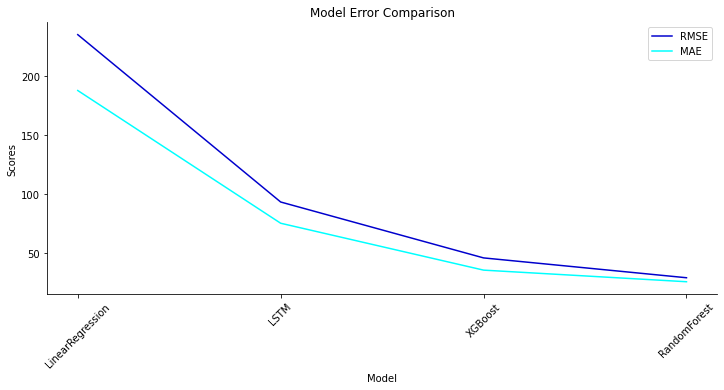

In [8]:
plot_results(results)

In [9]:
rf=25.375
average_monthly_sales = 548.8 #see eda notebook
percentage_off = round(rf/average_monthly_sales*100, 2)

print(f"With Random Forest, prediction is within {percentage_off}% of the actual.")

With Random Forest, prediction is within 4.62% of the actual.
